In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
fpath      = 'admin1_lag3'

In [3]:
def get_cv_df(model, fpath):
    cv = pd.read_csv(f"ml/results/{fpath}/cv_search_{model}.csv")

    # Get parameters explored
    params_searched = [i for i in cv.columns if "param_" in i]

    # Filter columns 
    cv = cv[params_searched + ['mean_test_score', 'std_test_score','mean_train_score', 'std_train_score']]
    cv.set_index(params_searched, inplace=True)

    # Change objective to positive (MSE was made negative for optimization purposes)
    cv['mean_test_score'] *=-1
    cv['mean_train_score'] *=-1
    
    return cv

In [4]:
plot_df = get_cv_df("Lasso", fpath)

# Lasso regression

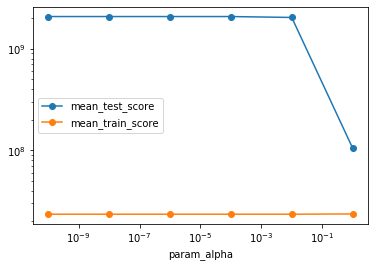

In [5]:
plot_df[['mean_test_score', 'mean_train_score']].plot(logy=True, logx=True, marker="o")

# Ridge Regression

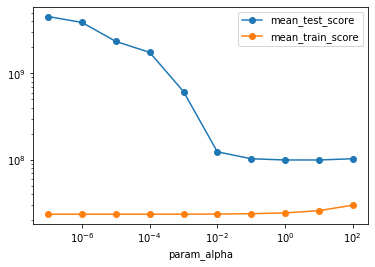

In [6]:
plot_df = get_cv_df("Ridge", fpath)
plot_df[['mean_test_score', 'mean_train_score']].plot(logy=True, logx=True, marker="o")

In [7]:
np.logspace(-7, 2, 10)

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02])

In [8]:
#ax = plot_df.plot(y='mean_test_score', yerr = 'std_test_score', logx=True, logy=True)
#plot_df.plot(y='mean_train_score', yerr = 'std_train_score', logx=True, logy=True, ax=ax)

# Decision Tree

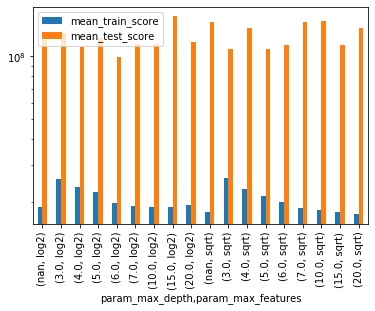

In [9]:
plot_df = get_cv_df("Decisiontree", fpath)
plot_df.sort_index(level='param_max_features', inplace=True)
plot_df[['mean_train_score', 'mean_test_score']].plot(kind='bar', logy=True)

Text(0.5, 1, 'Test Data')

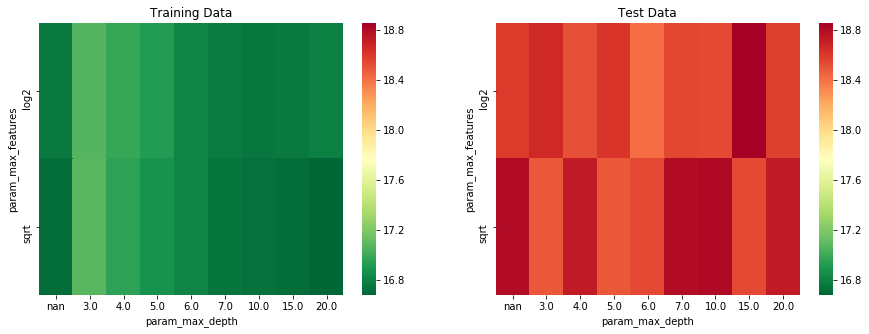

In [10]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
plot_df = np.log(plot_df.unstack(level='param_max_depth'))

vmin = plot_df[['mean_test_score', 'mean_train_score']].min().min()
vmax = plot_df[['mean_test_score', 'mean_train_score']].max().max()

sns.heatmap(plot_df.mean_train_score, ax=ax[0], cmap="RdYlGn_r", vmin = vmin, vmax=vmax)
sns.heatmap(plot_df.mean_test_score, ax=ax[1], cmap="RdYlGn_r", vmin = vmin, vmax=vmax)

ax[0].set_title("Training Data")
ax[1].set_title("Test Data")

# Random forest

In [11]:
plot_df = get_cv_df("Randomforest", fpath)
#plot_df.sort_index(level='param_max_features', inplace=True)

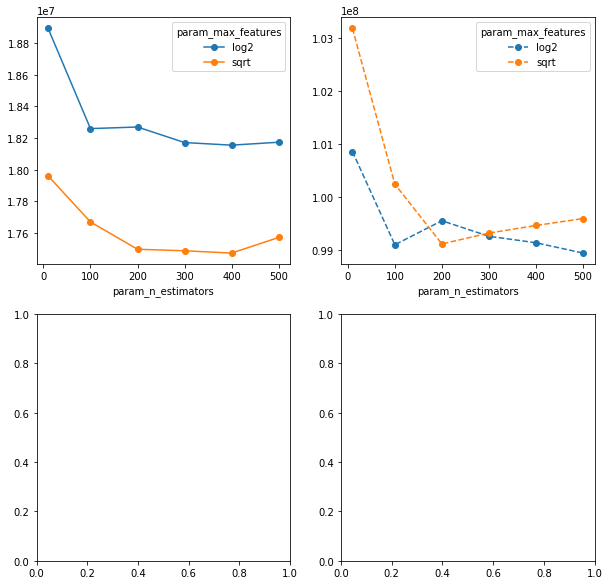

In [12]:
fig, ax = plt.subplots(2,2, figsize=[10,10])

#plot_df.loc[10].unstack(level='param_max_features').mean_train_score.plot(ax=ax, marker="o") #, logx=True, logy=True)
plot_df.loc[10].unstack(level='param_max_features').mean_train_score.plot(marker="o",  ax=ax[0][0])
plot_df.loc[10].unstack(level='param_max_features').mean_test_score.plot(marker="o", linestyle="--", ax=ax[0][1])

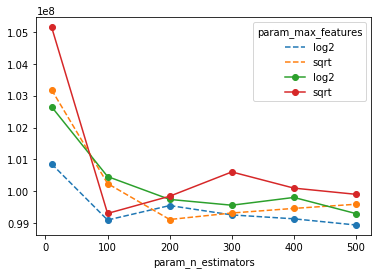

In [13]:
ax =plot_df.loc[10].unstack(level='param_max_features').mean_test_score.plot(marker="o", linestyle="--")
plot_df.loc[5].unstack(level='param_max_features').mean_test_score.plot(marker="o", ax=ax)

Text(0.5, 1, 'Test Data')

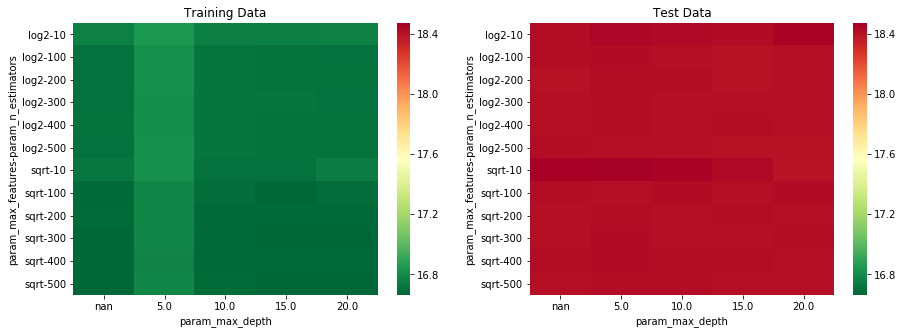

In [14]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
plot_df = np.log(plot_df.unstack(level='param_max_depth'))

vmin = plot_df[['mean_test_score', 'mean_train_score']].min().min()
vmax = plot_df[['mean_test_score', 'mean_train_score']].max().max()

sns.heatmap(plot_df.mean_train_score, ax=ax[0], cmap="RdYlGn_r", vmin = vmin, vmax=vmax)
sns.heatmap(plot_df.mean_test_score, ax=ax[1], cmap="RdYlGn_r", vmin = vmin, vmax=vmax)

ax[0].set_title("Training Data")
ax[1].set_title("Test Data")

# Adaboost

In [15]:
plot_df = get_cv_df("Adaboost", fpath)

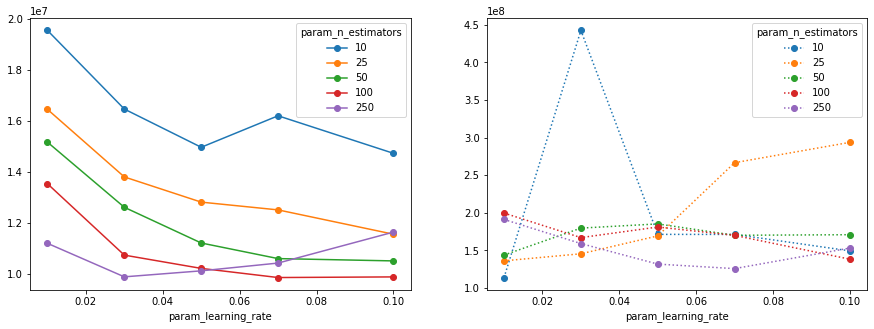

In [16]:
fig, ax = plt.subplots(1,2, figsize=[15,5])

plot_df.unstack(level='param_n_estimators').mean_train_score.plot(marker="o",  ax=ax[0])
plot_df.unstack(level='param_n_estimators').mean_test_score.plot(marker="o", linestyle=":", ax=ax[1])

#ax[1].set_xlim(0,.2)

# Xgboost

In [17]:
plot_df = get_cv_df("Xgboost", fpath)


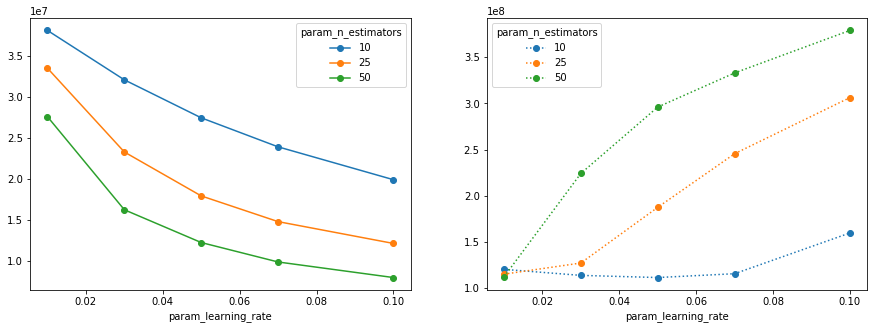

In [18]:
fig, ax = plt.subplots(1,2, figsize=[15,5])

plot_df.unstack(level='param_n_estimators').mean_train_score.plot(marker="o",  ax=ax[0])
plot_df.unstack(level='param_n_estimators').mean_test_score.plot(marker="o", linestyle=":", ax=ax[1])

#ax[1].set_xlim(0,.2)

# Perceptron

In [19]:
plot_df = get_cv_df("Perceptron", fpath)

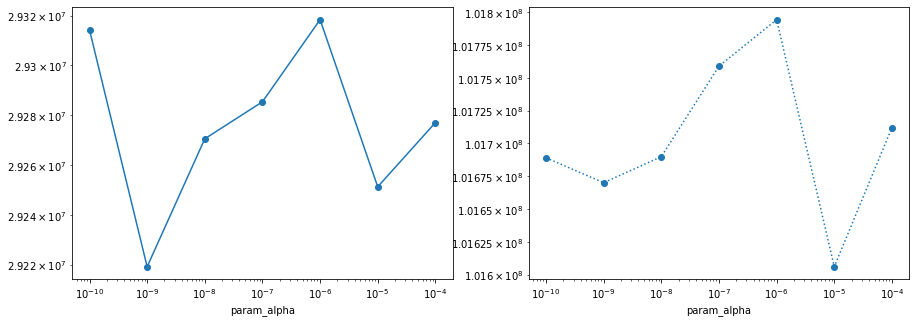

In [20]:
fig, ax = plt.subplots(1,2, figsize=[15,5])

plot_df.xs('(200,)', level='param_hidden_layer_sizes').xs('relu', level='param_activation').mean_train_score.plot(marker="o",  ax=ax[0], logy=True, logx=True)
plot_df.xs('(200,)', level='param_hidden_layer_sizes').xs('relu', level='param_activation').mean_test_score.plot(marker="o", linestyle=":", ax=ax[1], logy=True, logx=True)

#ax[1].set_xlim(0,.2)

In [21]:
np.logspace(-10, -4, 7)

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04])